In [330]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import pyneb as pn # We use the pn alias for PyNeb
import numpy as np
import mplparams
print(pn.__version__)
HENE = '/Users/alvis/Research/CLEAR_NeV/'
HENE_DATA = HENE+'data/'
FIGURES = HENE+'figures/'


1.1.15


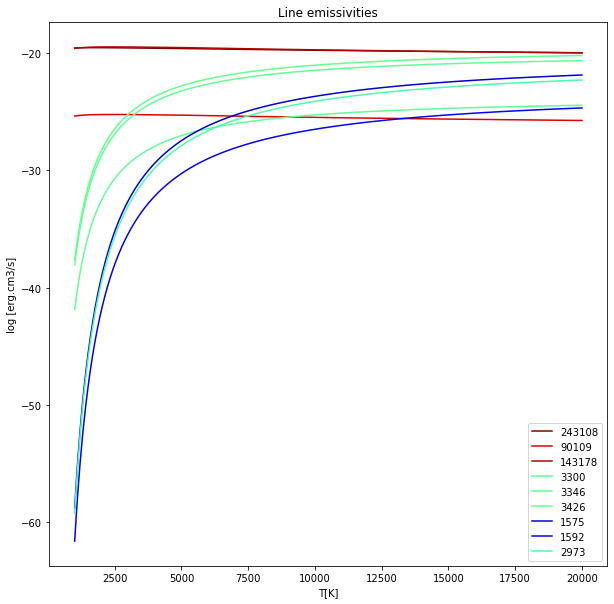

In [58]:
f, ax = plt.subplots(figsize=(10,10))
NeV.plotEmiss(tem_min=1000, tem_max=20000, ionic_abund=1.0, den=1e3, style='-', 
             legend_loc=4, temLog=False, plot_total=False, plot_only_total=False, 
             legend=True, total_color='black', total_label='TOTAL', ax=ax)


In [196]:
print(map_oiii.getGrid(wave=5007)/map_oiii.getGrid(wave=4959))

[[2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]
 [2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]
 [2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]
 ...
 [2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]
 [2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]
 [2.98396901 2.98396901 2.98396901 ... 2.98396901 2.98396901 2.98396901]]


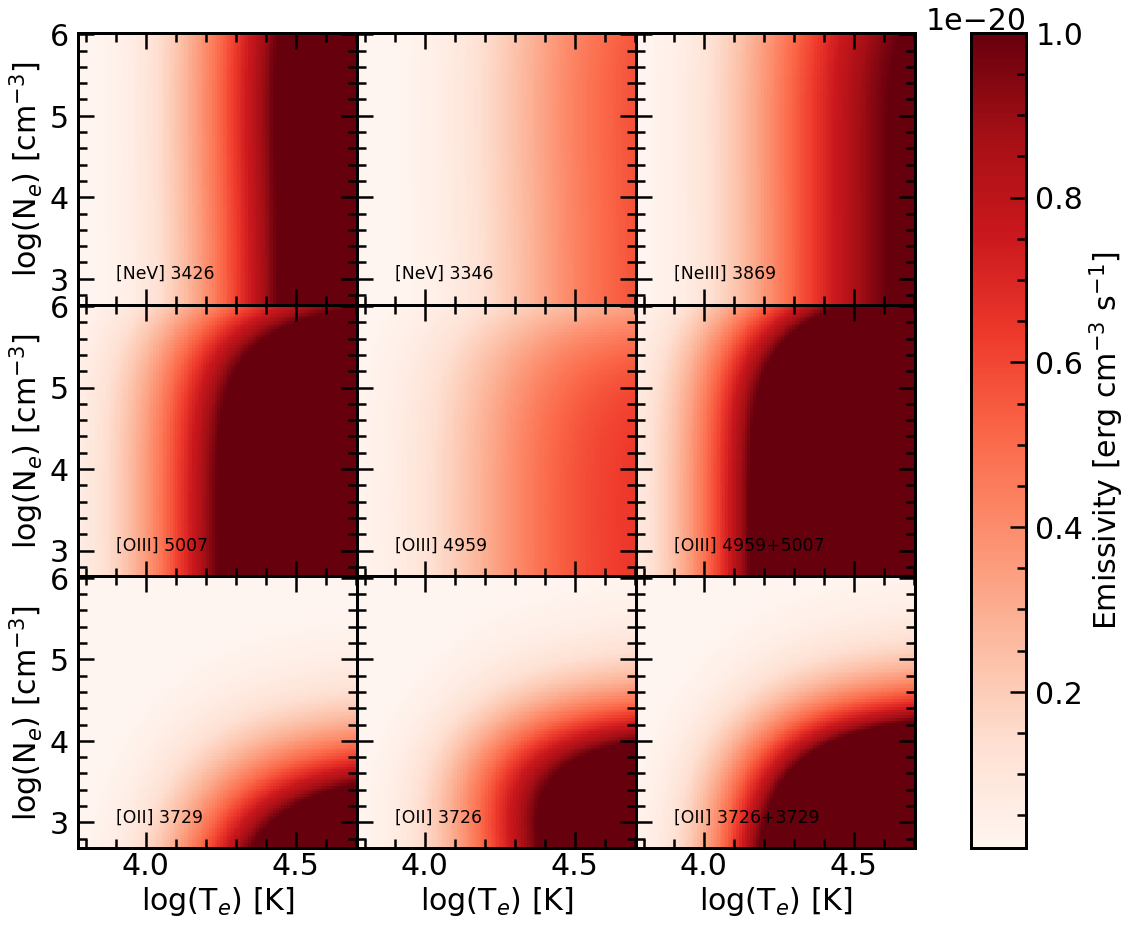

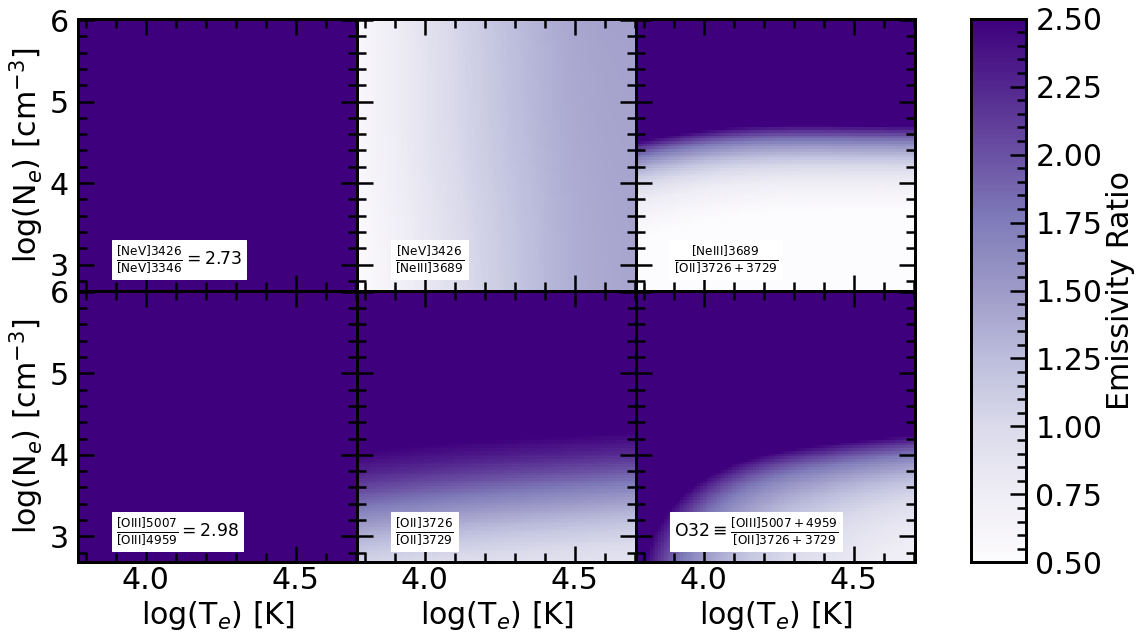

In [340]:
pn.atomicData.resetDataFileDict()
map_nev=pn.EmisGrid('Ne', 5, tem_min=6000, tem_max=50000.00, 
                den_min=500, den_max=1e6, n_tem=100, n_den=100)
map_neiii=pn.EmisGrid('Ne', 3, tem_min=6000, tem_max=50000.00, 
                den_min=500, den_max=1e6, n_tem=100, n_den=100)
map_oiii=pn.EmisGrid('O', 3, tem_min=6000, tem_max=50000.00, 
                den_min=500, den_max=1e6, n_tem=100, n_den=100)
map_oii=pn.EmisGrid('O', 2, tem_min=6000, tem_max=50000.00, 
                den_min=500, den_max=1e6, n_tem=100, n_den=100)
X=np.log10(map_nev.tem2D)
Y=np.log10(map_nev.den2D)

fig = plt.figure(figsize = (17,15))
gs = GridSpec(nrows=15, ncols=17)
gs.update(wspace = 0, hspace = 0)

ax0 = fig.add_subplot(gs[0:5, 0:5])
y0 = ax0.pcolormesh(X, Y, map_nev.getGrid(wave=3426), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax0.set_ylabel(r'log(N$_e$) [cm$^{-3}$]')
ax0.tick_params(labelbottom=False)
ax0.annotate('[NeV] 3426', (3.9, 3), fontsize='xx-large')

ax1 = fig.add_subplot(gs[0:5, 5:10])
ax1.pcolormesh(X, Y, map_nev.getGrid(wave=3346), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax1.tick_params(labelleft=False, labelbottom=False)
ax1.annotate('[NeV] 3346', (3.9, 3), fontsize='xx-large')

ax2 = fig.add_subplot(gs[0:5, 10:15])
ax2.pcolormesh(X, Y, map_neiii.getGrid(wave=3869), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax2.tick_params(labelleft=False, labelbottom=False)
ax2.annotate('[NeIII] 3869', (3.9, 3), fontsize='xx-large')

ax3 = fig.add_subplot(gs[5:10, 0:5])
ax3.pcolormesh(X, Y, map_oiii.getGrid(wave=5007), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax3.set_ylabel(r'log(N$_e$) [cm$^{-3}$]')
ax3.tick_params(labelbottom=False)
ax3.annotate('[OIII] 5007', (3.9, 3), fontsize='xx-large')

ax4 = fig.add_subplot(gs[5:10, 5:10])
ax4.pcolormesh(X, Y, map_oiii.getGrid(wave=4959), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax4.tick_params(labelleft=False, labelbottom=False)
ax4.annotate('[OIII] 4959', (3.9, 3), fontsize='xx-large')

ax5 = fig.add_subplot(gs[5:10, 10:15])
ax5.pcolormesh(X, Y, map_oiii.getGrid(wave=5007)+map_oiii.getGrid(wave=4959), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax5.tick_params(labelleft=False, labelbottom=False)
ax5.annotate('[OIII] 4959+5007', (3.9, 3), fontsize='xx-large')

ax6 = fig.add_subplot(gs[10:15, 0:5])
ax6.pcolormesh(X, Y, map_oii.getGrid(wave=3729), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax6.set_xlabel(r'log(T$_e$) [K]')
ax6.set_ylabel(r'log(N$_e$) [cm$^{-3}$]')
ax6.tick_params()
ax6.annotate('[OII] 3729', (3.9, 3), fontsize='xx-large')

ax7 = fig.add_subplot(gs[10:15, 5:10])
ax7.pcolormesh(X, Y, map_oii.getGrid(wave=3726), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax7.set_xlabel(r'log(T$_e$) [K]')
ax7.tick_params(labelleft=False)
ax7.annotate('[OII] 3726', (3.9, 3), fontsize='xx-large')

ax8 = fig.add_subplot(gs[10:15, 10:15])
ax8.pcolormesh(X, Y, map_oii.getGrid(wave=3729)+map_oii.getGrid(wave=3726), cmap='Reds', vmin=1e-22, vmax=1e-20, shading='auto')
ax8.tick_params(labelleft=False)
ax8.set_xlabel(r'log(T$_e$) [K]')
ax8.annotate('[OII] 3726+3729', (3.9, 3), fontsize='xx-large')

axcbar = fig.add_subplot(gs[0:15,16:17])
fig.colorbar(y0,axcbar,use_gridspec=True ,  label = r'Emissivity [erg cm$^{-3}$ s$^{-1}$]')

plt.savefig(FIGURES+'pyneb_models.png', format='png', dpi=250, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize = (17,10))
gs = GridSpec(nrows=10, ncols=17)
gs.update(wspace = 0, hspace = 0)

ax0 = fig.add_subplot(gs[0:5, 0:5])
y0 = ax0.pcolormesh(X, Y, map_nev.getGrid(wave=3426)/map_nev.getGrid(wave=3346), cmap='Purples', vmin=0.5, vmax=2.5, shading='auto')
ax0.tick_params(labelbottom=False)
ax0.set_ylabel(r'log(N$_e$) [cm$^{-3}$]')

# legend_elements1 = [Line2D([0], [0], label=r'$\frac{\mathrm{[NeV]} 3426}{\mathrm{[NeV]} 3346} = 2.73$', linestyle='None', marker='None')]
# ax0.legend(handles=legend_elements1, loc='center')
ax0.annotate(r'$\frac{\mathrm{[NeV]} 3426}{\mathrm{[NeV]} 3346} = 2.73$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

ax1 = fig.add_subplot(gs[0:5, 5:10])
ax1.pcolormesh(X, Y, map_nev.getGrid(wave=3426)/map_neiii.getGrid(wave=3869), cmap='Purples', vmin=0.5, vmax=2.5, shading='auto')
ax1.tick_params(labelleft=False, labelbottom=False)
ax1.annotate(r'$\frac{\mathrm{[NeV]} 3426}{\mathrm{[NeIII]} 3689}$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

ax2 = fig.add_subplot(gs[0:5, 10:15])
ax2.pcolormesh(X, Y, map_neiii.getGrid(wave=3869)/(map_oii.getGrid(wave=3726)+map_oii.getGrid(wave=3729)), cmap='Purples', vmin=0.5, vmax=2.5,   shading='auto')
ax2.tick_params(labelleft=False, labelbottom=False)
ax2.annotate(r'$\frac{\mathrm{[NeIII]} 3689}{\mathrm{[OII]} 3726+3729}$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

ax3 = fig.add_subplot(gs[5:10, 0:5])
ax3.pcolormesh(X, Y, map_oiii.getGrid(wave=5007)/map_oiii.getGrid(wave=4959), cmap='Purples', vmin=0.5, vmax=2.5,   shading='auto')
ax3.tick_params()
ax3.set_xlabel(r'log(T$_e$) [K]')
ax3.set_ylabel(r'log(N$_e$) [cm$^{-3}$]')
ax3.annotate(r'$\frac{\mathrm{[OIII]} 5007}{\mathrm{[OIII]} 4959}=2.98$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

ax4 = fig.add_subplot(gs[5:10, 5:10])
ax4.pcolormesh(X, Y, map_oii.getGrid(wave=3726)/map_oii.getGrid(wave=3729), cmap='Purples', vmin=0.5, vmax=2.5,  shading='auto')
ax4.tick_params(labelleft=False)
ax4.set_xlabel(r'log(T$_e$) [K]')
ax4.annotate(r'$\frac{\mathrm{[OII]} 3726}{\mathrm{[OII]} 3729}$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

ax5 = fig.add_subplot(gs[5:10, 10:15])
ax5.pcolormesh(X, Y, (map_oiii.getGrid(wave=5007)+map_oiii.getGrid(wave=4959))/(map_oii.getGrid(wave=3726)+map_oii.getGrid(wave=3729)), cmap='Purples', vmin=0.5, vmax=2.5, shading='auto')
ax5.tick_params(labelleft=False)
ax5.set_xlabel(r'log(T$_e$) [K]')
ax5.annotate(r'$\mathrm{O32}\equiv\frac{\mathrm{[OIII]} 5007+4959}{\mathrm{[OII]} 3726+3729}$', (3.9, 3), fontsize='xx-large', backgroundcolor='white')

axcbar = fig.add_subplot(gs[0:10,16:17])
fig.colorbar(y0,axcbar,use_gridspec=True ,  label = r'Emissivity Ratio')

plt.savefig(FIGURES+'pyneb_models_ratios.png', format='png', dpi=250, bbox_inches='tight')
plt.show()



In [275]:
map_oiii.getGrid(wave=5007)/map_oiii.getGrid(wave=4959)

array([[2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901],
       [2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901],
       [2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901],
       ...,
       [2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901],
       [2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901],
       [2.98396901, 2.98396901, 2.98396901, ..., 2.98396901, 2.98396901,
        2.98396901]])

In [247]:
map_nev.getGrid(wave=3426)/map_nev.getGrid(wave=3346)

array([[2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961],
       [2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961],
       [2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961],
       ...,
       [2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961],
       [2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961],
       [2.72941961, 2.72941961, 2.72941961, ..., 2.72941961, 2.72941961,
        2.72941961]])

In [276]:
map_nev.getGrid(wave=3426)/map_neiii.getGrid(wave=3869)

array([[0.51546487, 0.51613797, 0.51684936, ..., 0.58744881, 0.58867932,
        0.59001984],
       [0.52792142, 0.52858944, 0.52929563, ..., 0.60057408, 0.60181787,
        0.60317279],
       [0.54042712, 0.54108972, 0.54179036, ..., 0.61372563, 0.61498235,
        0.61635125],
       ...,
       [1.41801398, 1.41807123, 1.41813268, ..., 1.45445168, 1.45594558,
        1.45755578],
       [1.41947136, 1.41952643, 1.41958556, ..., 1.45506677, 1.45655985,
        1.45816916],
       [1.42084947, 1.42090241, 1.42095925, ..., 1.45560354, 1.45709542,
        1.45870347]])